In [1]:
#import librabries

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading a dataset in jupyter
police_data=pd.read_csv(r"C:\Users\HP\Downloads\police.csv")

In [3]:
police_data

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,12/6/2012,17:54,NaN,F,1987.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
65531,12/6/2012,22:22,NaN,M,1954.0,58.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
65532,12/6/2012,23:20,NaN,M,1985.0,27.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
65533,12/7/2012,0:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False


In [4]:
# checking the shape of a dataset
police_data.shape

(65535, 15)

In [5]:
#copy the dataset in new variable
data=police_data.copy()

### Q. 1 Instruction ( For Data Cleaning ) - Remove the column that only contains missing values.

In [6]:
data.isnull().sum()

stop_date                 0
stop_time                 0
country_name          65535
driver_gender          4061
driver_age_raw         4054
driver_age             4307
driver_race            4060
violation_raw          4060
violation              4060
search_conducted          0
search_type           63056
stop_outcome           4060
is_arrested            4060
stop_duration          4060
drugs_related_stop        0
dtype: int64

In [7]:
data.drop(columns="country_name",inplace=True)

In [8]:
data

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,12/6/2012,17:54,F,1987.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
65531,12/6/2012,22:22,M,1954.0,58.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
65532,12/6/2012,23:20,M,1985.0,27.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
65533,12/7/2012,0:23,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False


## Q. 2) Question ( Based on Filtering + Value Counts ) - For Speeding , were Men or Women stopped more often ? 

In [9]:
data.groupby([data["violation"]=="Speeding"]).driver_gender.value_counts()

violation  driver_gender
False      M                19647
           F                 4624
True       M                25517
           F                11686
Name: count, dtype: int64

In [10]:
data.groupby("violation").get_group("Speeding").driver_gender.value_counts()

driver_gender
M    25517
F    11686
Name: count, dtype: int64

## Q. 3) Question ( Groupby ) - Does gender affect who gets searched during a stop ?

In [11]:
data.groupby("driver_gender")["search_conducted"].sum()

driver_gender
F     366
M    2113
Name: search_conducted, dtype: int64

### Q. 4) Question ( mapping + data-type casting ) - What is the mean stop_duration ?

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           65535 non-null  object 
 1   stop_time           65535 non-null  object 
 2   driver_gender       61474 non-null  object 
 3   driver_age_raw      61481 non-null  float64
 4   driver_age          61228 non-null  float64
 5   driver_race         61475 non-null  object 
 6   violation_raw       61475 non-null  object 
 7   violation           61475 non-null  object 
 8   search_conducted    65535 non-null  bool   
 9   search_type         2479 non-null   object 
 10  stop_outcome        61475 non-null  object 
 11  is_arrested         61475 non-null  object 
 12  stop_duration       61475 non-null  object 
 13  drugs_related_stop  65535 non-null  bool   
dtypes: bool(2), float64(2), object(10)
memory usage: 6.1+ MB


In [13]:
data["stop_duration"].value_counts()

stop_duration
0-15 Min     47379
16-30 Min    11448
30+ Min       2647
2                1
Name: count, dtype: int64

In [14]:
data["stop_duration"]=data["stop_duration"].map({'0-15 Min':7.5,'16-30 Min':24,'30+ Min':45})

In [15]:
data["stop_duration"].mean()

12.187420698181345

In [16]:
data["stop_duration"].describe()

count    61474.000000
mean        12.187421
std          9.448853
min          7.500000
25%          7.500000
50%          7.500000
75%          7.500000
max         45.000000
Name: stop_duration, dtype: float64

In [17]:
data["stop_duration"].isnull().sum()

4061

In [18]:
data["stop_duration"].value_counts()

stop_duration
7.5     47379
24.0    11448
45.0     2647
Name: count, dtype: int64

In [19]:
data

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,24.0,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,12/6/2012,17:54,F,1987.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
65531,12/6/2012,22:22,M,1954.0,58.0,White,Speeding,Speeding,False,NaN,Warning,False,7.5,False
65532,12/6/2012,23:20,M,1985.0,27.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,7.5,False
65533,12/7/2012,0:23,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False


### Q. 5) Question ( Groupby , Describe ) - Compare the age distributions for each violation.

In [20]:
data.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False


In [21]:
a=data.groupby("violation").driver_age.describe()

In [22]:
a

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,6507.0,31.682957,11.380671,16.0,23.0,28.0,39.0,81.0
Moving violation,11876.0,36.736443,13.258350,15.0,25.0,35.0,47.0,86.0
Other,3477.0,40.362381,12.754423,16.0,30.0,41.0,50.0,86.0
Registration/plates,2240.0,32.656696,11.150780,16.0,24.0,30.0,40.0,74.0
Seat belt,3.0,30.333333,10.214369,23.0,24.5,26.0,34.0,42.0
Speeding,37120.0,33.262581,12.615781,15.0,23.0,30.0,42.0,88.0


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


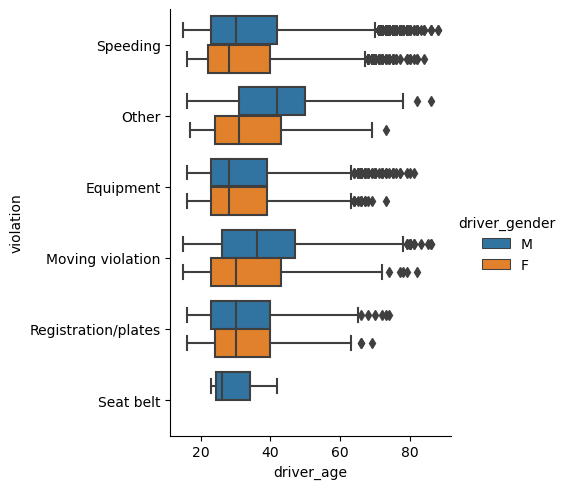

In [23]:
sb.catplot(x="driver_age",y="violation",data=data,hue="driver_gender",kind="box")

In [24]:
a

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,6507.0,31.682957,11.380671,16.0,23.0,28.0,39.0,81.0
Moving violation,11876.0,36.736443,13.258350,15.0,25.0,35.0,47.0,86.0
Other,3477.0,40.362381,12.754423,16.0,30.0,41.0,50.0,86.0
Registration/plates,2240.0,32.656696,11.150780,16.0,24.0,30.0,40.0,74.0
Seat belt,3.0,30.333333,10.214369,23.0,24.5,26.0,34.0,42.0
Speeding,37120.0,33.262581,12.615781,15.0,23.0,30.0,42.0,88.0


In [25]:
#removing ouliter and treating them
a1=data.groupby("violation").get_group("Speeding")


In [26]:
a1.describe()

,driver_age_raw,driver_age,stop_duration
count,37204.000000,37120.000000,37204.000000
mean,1972.189711,33.262581,10.606763
std,86.672468,12.615781,7.223115
min,0.000000,15.000000,7.500000
25%,1966.000000,23.000000,7.500000
50%,1979.000000,30.000000,7.500000
75%,1985.000000,42.000000,7.500000
max,8801.000000,88.000000,45.000000


In [27]:
Q1=data["driver_age"].quantile(0.25)
Q3=data["driver_age"].quantile(0.75)

In [28]:
Q2=data["driver_age"].median()

In [29]:
Q2

31.0

In [30]:
IQR=Q3-Q1

upperbound=Q3+1.5*IQR
lowerbound=Q1-1.5*IQR

In [31]:
lowerbound

-7.0

Text(0.5, 1.0, 'data with outliers')

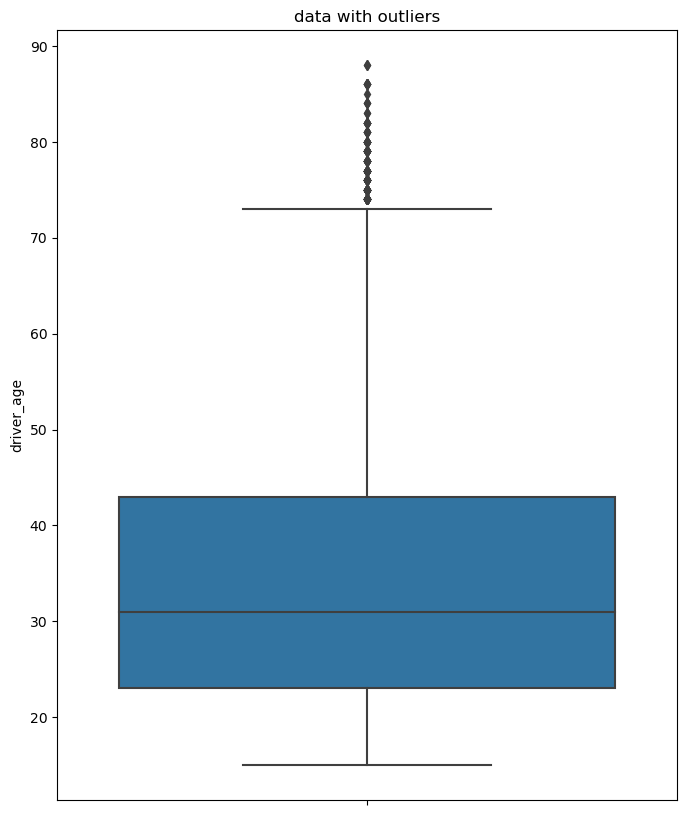

In [32]:
plt.figure(figsize=(8,10))
sb.boxplot(y="driver_age",data=data)
plt.title("data with outliers")

In [33]:
# removing the outliers
outlier_remove=data[(data["driver_age"]>=lowerbound) & (data["driver_age"]<=upperbound)]

In [34]:
outlier_remove

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,24.0,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65529,12/6/2012,16:00,M,1994.0,18.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
65530,12/6/2012,17:54,F,1987.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
65531,12/6/2012,22:22,M,1954.0,58.0,White,Speeding,Speeding,False,NaN,Warning,False,7.5,False
65532,12/6/2012,23:20,M,1985.0,27.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,7.5,False


Text(0.5, 1.0, 'Remove outlier')

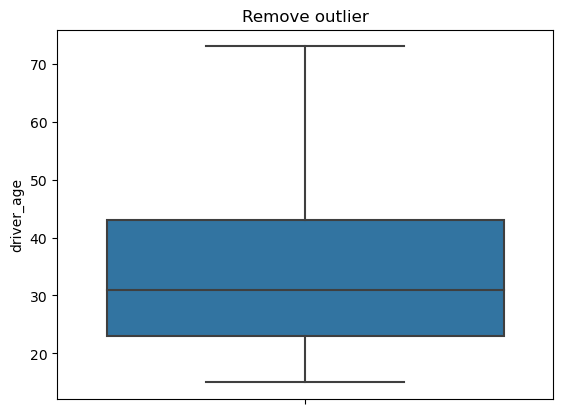

In [35]:
sb.boxplot(y=outlier_remove['driver_age'],data=data)
plt.title("Remove outlier")